# Assignment 9

## 1. SVM (Linearly Seperable Data)

### You are given a two dimensional dataset (SVM_Q1) with 4 classes and you have to use SVM for classification.

### Import the required libraries 

In [78]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

### The code for loading data is given below.

In [79]:
# load data (do not change it)
X_train, X_test, y_train, y_test = np.load("./SVM_Q1.npy", allow_pickle=True)

<IPython.core.display.Javascript object>

### 1.a) Write code to visualize the training data

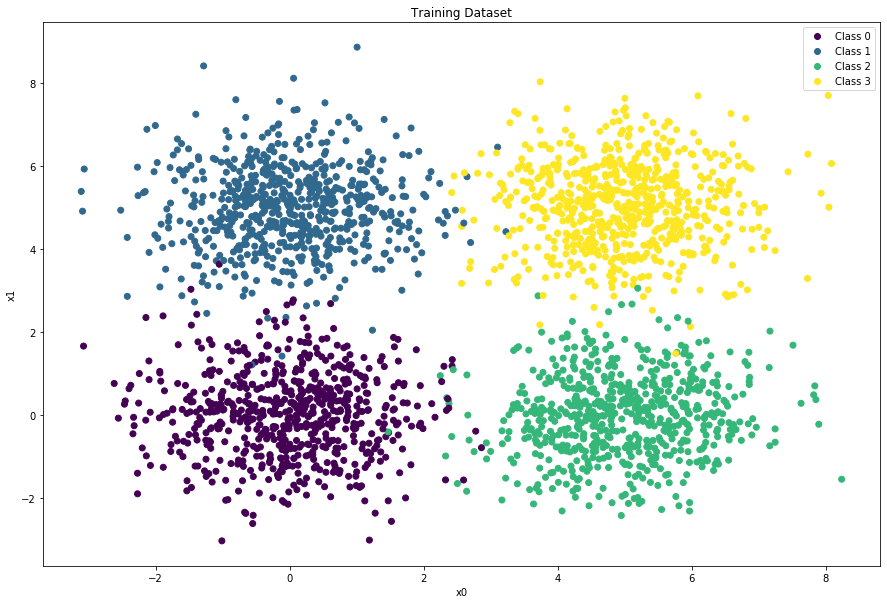

<IPython.core.display.Javascript object>

In [80]:
plt.figure(figsize=(15, 10))
sc = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title("Training Dataset")
plt.xlabel("x0")
plt.ylabel("x1")
plt.legend(sc.legend_elements()[0], ["Class " + str(i) for i in range(4)])
plt.show()

### 1.b) Write the code for SVM classifier (you can write code from scratch or use sklrean)

In [81]:
svm = SVC()

svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

<IPython.core.display.Javascript object>

### 1.c) Generate the confusion matrix for the classifer on the test data

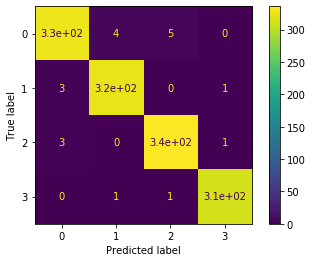

<IPython.core.display.Javascript object>

In [82]:
plot_confusion_matrix(svm, X_test, y_test)
plt.show()

### 1.d) Visualize the support vectors and decision boundary

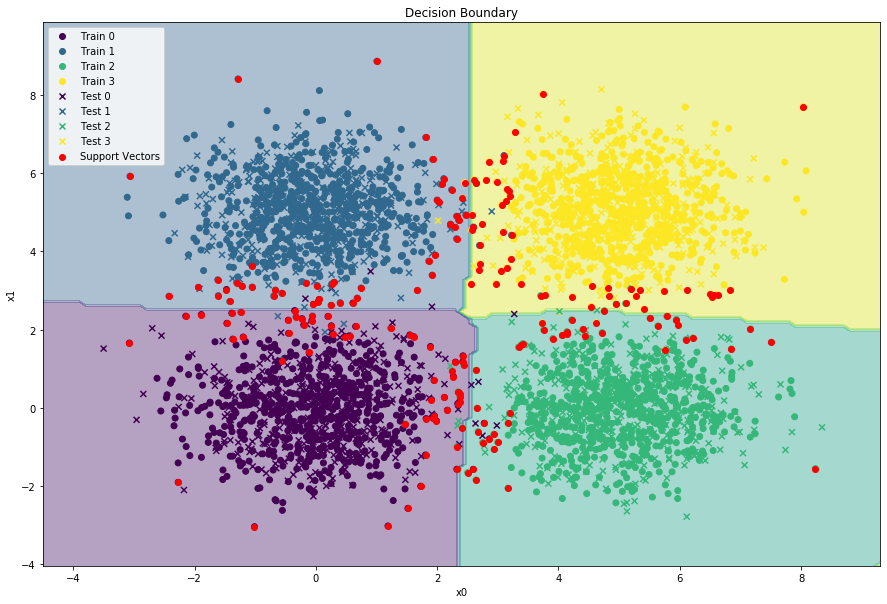

<IPython.core.display.Javascript object>

In [83]:
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 10))
plt.contourf(xx, yy, Z, alpha=0.4)
sc_train = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
sc_test = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker="x")

sc_sup = (plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], c="r"),)


plt.legend(
    sc_train.legend_elements()[0] + sc_test.legend_elements()[0] + [sc_sup],
    ["Train " + str(i) for i in range(4)]
    + ["Test " + str(i) for i in range(4)]
    + ["Support Vectors"],
)

plt.title("Decision Boundary")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

### 1.e) Report the accuracy obtained 

In [84]:
print(
    "Training Accuracy :",
    np.round(accuracy_score(y_train, svm.predict(X_train)) * 100, 2),
    "\b%",
)
print(
    "Test Accuracy     :",
    np.round(accuracy_score(y_test, svm.predict(X_test)) * 100, 2),
    "\b%",
)

Training Accuracy : 98.51 %
Test Accuracy     : 98.56 %


<IPython.core.display.Javascript object>

## 2. SVM (Non-linearly separable Data)

### You are given a two dimensional dataset with 2 classes as loaded below and you have to use SVM for classification.

In [85]:
# generating data (do not change it)
from sklearn.datasets import make_circles

X, Y = make_circles(n_samples=3000, noise=0.04)

<IPython.core.display.Javascript object>

### 2.a) Use train_test_split function in sklearn to split the dataset into train and test sets in the ratio of 80:20

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

<IPython.core.display.Javascript object>

### 2.b) Write the code for SVM classifier with polynomial kernel (you can write code from scratch or use sklrean)

Hint: Use kernel of degree 8.

In [87]:
svm_poly = SVC(kernel="poly", degree=8)

svm_poly.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

<IPython.core.display.Javascript object>

### 2.c) Generate the confusion matrix for the classifer on the test data

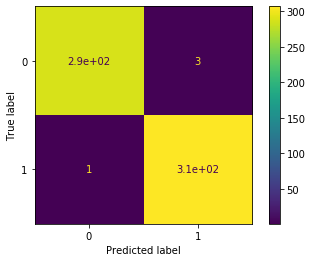

<IPython.core.display.Javascript object>

In [88]:
plot_confusion_matrix(svm_poly, X_test, y_test)
plt.show()

### 2.d) Visualize the support vectors and plot the decision boundary

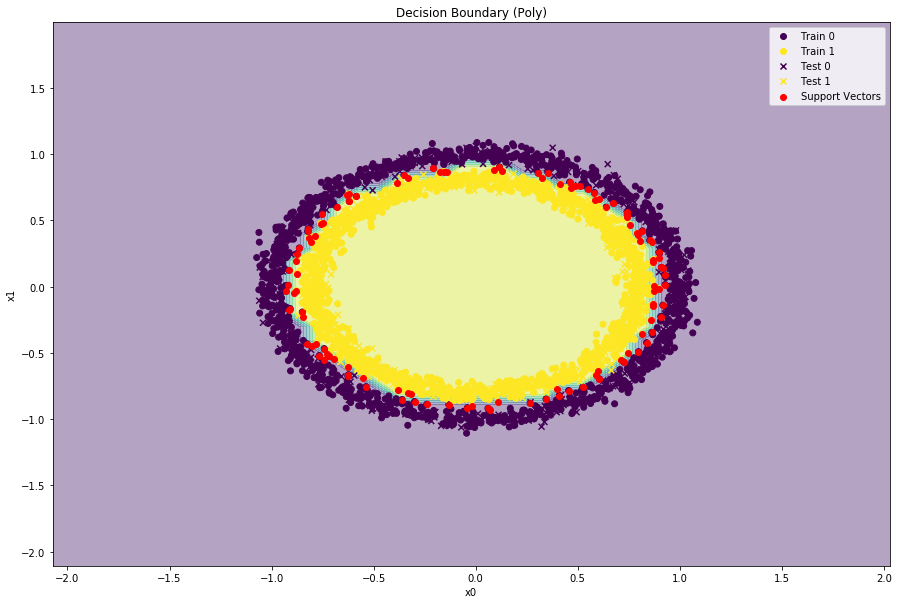

<IPython.core.display.Javascript object>

In [100]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 10))
plt.contourf(xx, yy, Z, alpha=0.4)
sc_train = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
sc_test = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker="x")

sc_sup = plt.scatter(
    svm_poly.support_vectors_[:, 0], svm_poly.support_vectors_[:, 1], c="r"
)


plt.legend(
    sc_train.legend_elements()[0] + sc_test.legend_elements()[0] + [sc_sup],
    ["Train " + str(i) for i in range(2)]
    + ["Test " + str(i) for i in range(2)]
    + ["Support Vectors"],
)

plt.title("Decision Boundary (Poly)")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

### 2.e) Report the accuracy obtained 

In [92]:
print(
    "Training Accuracy :",
    np.round(accuracy_score(y_train, svm_poly.predict(X_train)) * 100, 2),
    "\b%",
)
print(
    "Test Accuracy     :",
    np.round(accuracy_score(y_test, svm_poly.predict(X_test)) * 100, 2),
    "\b%",
)

Training Accuracy : 99.42 %
Test Accuracy     : 99.33 %


<IPython.core.display.Javascript object>

### 2.f) Repeat the above steps with sigmoid kernel (you can write code from scratch or use sklearn). You can tune the parameter to obtain better accuracy on test set.

In [93]:
svm_sig = SVC(kernel="sigmoid")
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10],
    "gamma": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

grid_sig = GridSearchCV(svm_sig, param_grid, refit=True)

<IPython.core.display.Javascript object>

In [108]:
grid_sig.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='sigmoid', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

<IPython.core.display.Javascript object>

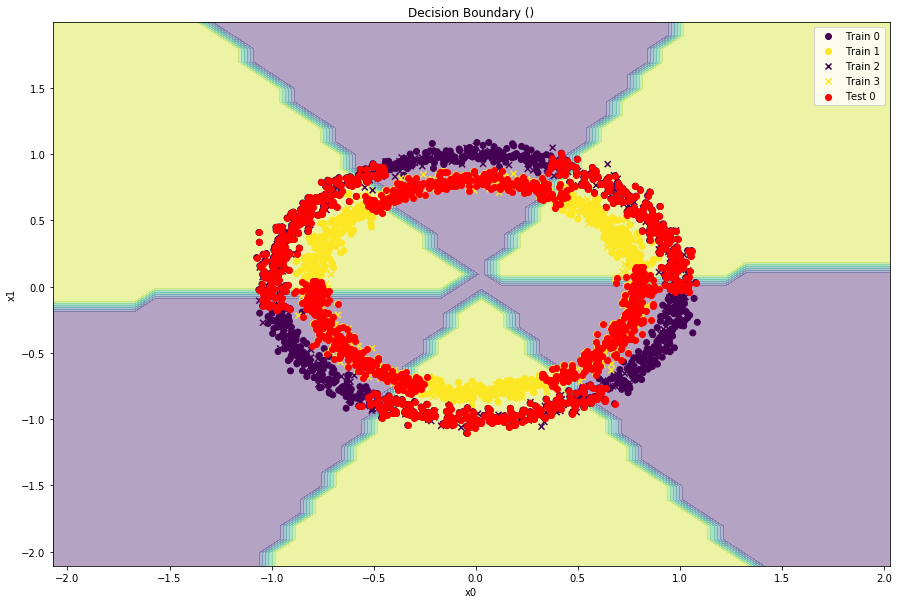

<IPython.core.display.Javascript object>

In [109]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = grid_sig.best_estimator_.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 10))
plt.contourf(xx, yy, Z, alpha=0.4)
sc_train = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
sc_test = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker="x")

sc_sup = plt.scatter(
    grid_sig.best_estimator_.support_vectors_[:, 0],
    grid_sig.best_estimator_.support_vectors_[:, 1],
    c="r",
)


plt.legend(
    sc_train.legend_elements()[0] + sc_test.legend_elements()[0] + [sc_sup],
    ["Train " + str(i) for i in range(4)]
    + ["Test " + str(i) for i in range(4)]
    + ["Support Vectors"],
)

plt.title("Decision Boundary ()")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

In [110]:
print(
    "Training Accuracy :",
    np.round(
        accuracy_score(y_train, grid_sig.best_estimator_.predict(X_train)) * 100, 2
    ),
    "\b%",
)
print(
    "Test Accuracy     :",
    np.round(accuracy_score(y_test, grid_sig.best_estimator_.predict(X_test)) * 100, 2),
    "\b%",
)

Training Accuracy : 49.58 %
Test Accuracy     : 51.67 %


<IPython.core.display.Javascript object>

### 2.g) Reapeat the steps 2.c to 2.g with  radial basis function kernel (you can write code from scratch or use sklrean). You can tune the parameter to obtain better accuracy on test set.

In [104]:
svm_rbf = SVC(kernel="rbf")
param_grid = {
    "C": [0.001, 0.01, 0.1],
    "gamma": [1, 10, 100, 1000],
}

grid_rbf = GridSearchCV(svm_rbf, param_grid, refit=True)

<IPython.core.display.Javascript object>

In [105]:
grid_rbf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1], 'gamma': [1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

<IPython.core.display.Javascript object>

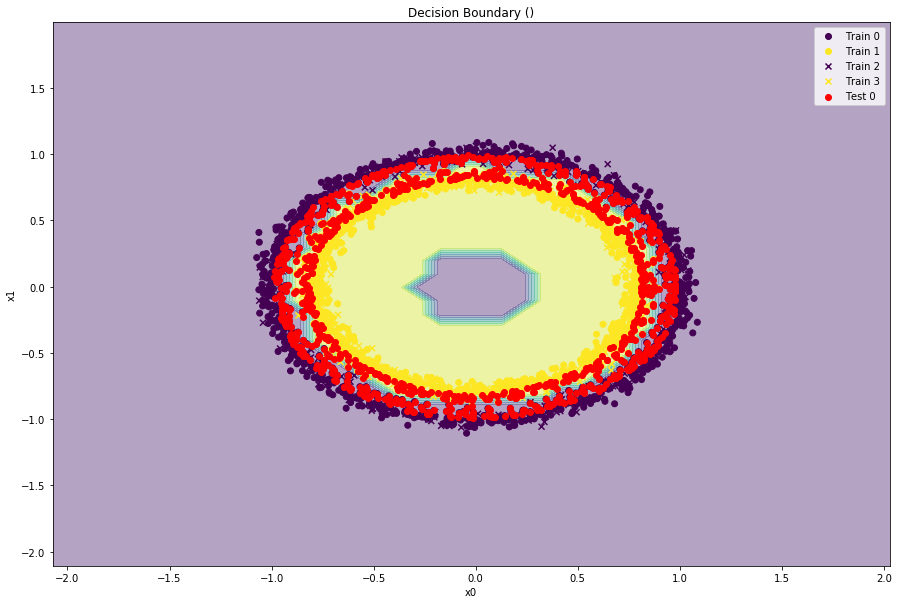

<IPython.core.display.Javascript object>

In [106]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = grid_rbf.best_estimator_.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 10))
plt.contourf(xx, yy, Z, alpha=0.4)
sc_train = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
sc_test = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker="x")

sc_sup = plt.scatter(
    grid_rbf.best_estimator_.support_vectors_[:, 0],
    grid_rbf.best_estimator_.support_vectors_[:, 1],
    c="r",
)


plt.legend(
    sc_train.legend_elements()[0] + sc_test.legend_elements()[0] + [sc_sup],
    ["Train " + str(i) for i in range(4)]
    + ["Test " + str(i) for i in range(4)]
    + ["Support Vectors"],
)

plt.title("Decision Boundary ()")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

In [107]:
print(
    "Training Accuracy :",
    np.round(
        accuracy_score(y_train, grid_rbf.best_estimator_.predict(X_train)) * 100, 2
    ),
    "\b%",
)
print(
    "Test Accuracy     :",
    np.round(accuracy_score(y_test, grid_rbf.best_estimator_.predict(X_test)) * 100, 2),
    "\b%",
)

Training Accuracy : 99.29 %
Test Accuracy     : 99.0 %


<IPython.core.display.Javascript object>

### 2.h) For which kernal in SVM, you have obtained the highest and lowest  accuracy? What do you think the reason for it? 

Polynomial Kernel seems to be working the best since the sheer number of features generated gives it high representational power to give good accuracy